In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import scipy.stats as stat
import statsmodels.api as sm 

In [2]:
boston_url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
boston =pd.read_csv(boston_url)

#### The following describes the dataset variables:

#### CRIM - per capita crime rate by town

#### ZN - proportion of residential land zoned for lots over 25,000 sq.ft.

#### INDUS - proportion of non-retail business acres per town.

#### CHAS - Charles River dummy variable (1 if tract bounds river; 0 otherwise)

#### NOX - nitric oxides concentration (parts per 10 million)

#### RM - average number of rooms per dwelling

#### AGE - proportion of owner-occupied units built prior to 1940

#### DIS - weighted distances to five Boston employment centres

#### RAD - index of accessibility to radial highways

#### TAX - full-value property-tax rate per $10,000

#### PTRATIO - pupil-teacher ratio by town

#### LSTAT - % lower status of the population

#### MEDV - Median value of owner-occupied homes in $1000's

For all visualizations, please include a title in each graph and appropriate labels

1. Generate the following and explain your findings:

2. ~~For the "Median value of owner-occupied homes" provide a boxplot~~

3. ~~Provide a  bar plot for the Charles river variable~~

4. ~~Provide a boxplot for the MEDV variable vs the AGE variable. (Discretize the age variable into three groups of 35 years and younger, between 35 and 70 years and 70 years and older)~~

5. ~~Provide a scatter plot to show the relationship between Nitric oxide concentrations and the proportion of non-retail business acres per town. What can you say about the relationship?~~

6. ~~Create a histogram for the pupil to teacher ratio variable~~

For each of the following questions;

7. ~~Is there a significant difference in median value of houses bounded by the Charles river or not? (T-test for independent samples)~~

8. ~~Is there a difference in Median values of houses (MEDV) for each proportion of owner occupied units built prior to 1940 (AGE)? (ANOVA)~~

9. ~~Can we conclude that there is no relationship between Nitric oxide concentrations and proportion of non-retail business acres per town? (Pearson Correlation)~~

10. ~~What is the impact of an additional weighted distance  to the five Boston employment centres on the median value of owner occupied homes? (Regression analysis)~~

Be sure to:

- State your hypothesis.

- Use α = 0.05

- Perform the test Statistics.

- State the conclusion from the test.

In [3]:
boston.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


In [4]:
boston.describe()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,252.500000,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,12.653063,22.532806
std,146.213884,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,7.141062,9.197104
min,0.000000,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,1.730000,5.000000
25%,126.250000,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,6.950000,17.025000
50%,252.500000,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,11.360000,21.200000
75%,378.750000,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,16.955000,25.000000
max,505.000000,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,37.970000,50.000000


Text(0, 0.5, 'median values(MEDV)')

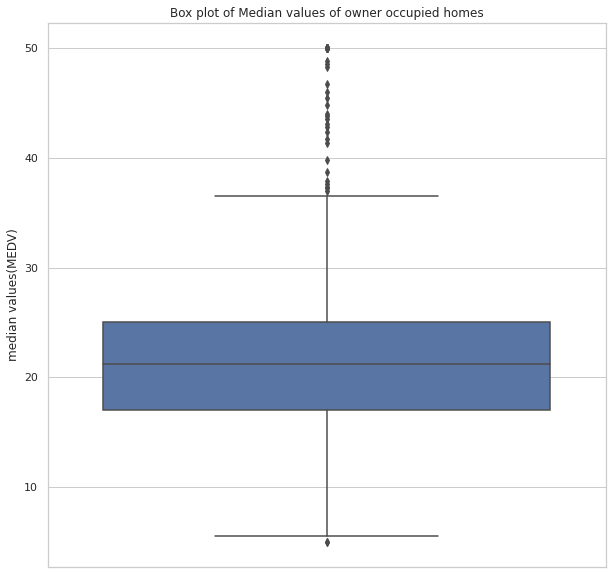

In [32]:
sb.set(style='whitegrid',rc={'figure.figsize':(10,10)})
boxplt = sb.boxplot(y='MEDV',data=boston)
boxplt.set_title('Box plot of Median values of owner occupied homes')
boxplt.set_ylabel("median values(MEDV)")

[Text(0.5, 1.0, 'Barplot for Chas variable'),
 Text(0.5, 0, 'Chas'),
 Text(0, 0.5, 'Count')]

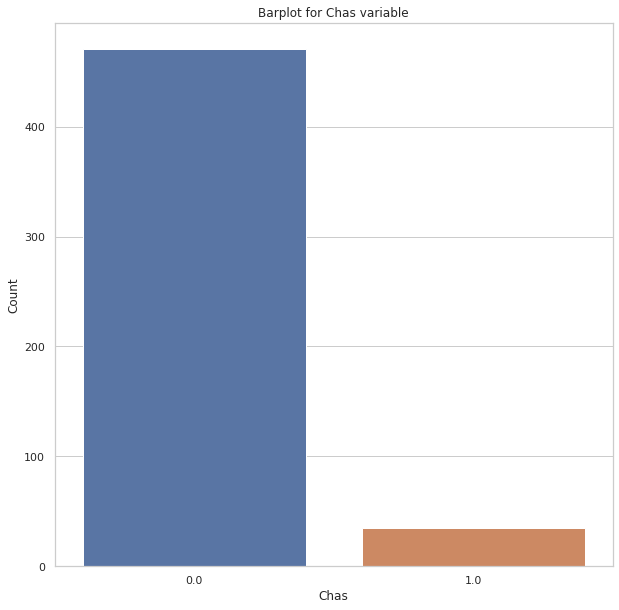

In [56]:
chas_plt = sb.barplot(x=boston.CHAS.unique(),y=boston.CHAS.value_counts())
chas_plt.set(title='Barplot for Chas variable',xlabel='Chas',ylabel='Count')

In [50]:
boston.loc[boston['AGE'] <= 35,'age_group'] = '35 years and younger'
boston.loc[(boston['AGE'] > 35) & (boston['AGE'] < 70),'age_group'] = 'between 35 and 70 years'
boston.loc[boston['AGE'] >= 70,'age_group'] = '70 years and older'

In [53]:
boston.loc[:,['AGE','age_group']].head()

,AGE,age_group
0,65.2,between 35 and 70 years
1,78.9,70 years and older
2,61.1,between 35 and 70 years
3,45.8,between 35 and 70 years
4,54.2,between 35 and 70 years


[Text(0.5, 1.0, 'Boxplot')]

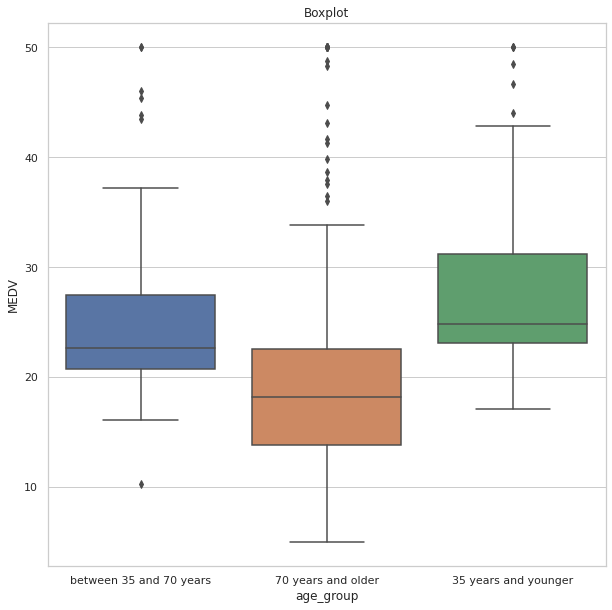

In [58]:
bxplt = sb.boxplot(x='age_group',y='MEDV',data=boston)
bxplt.set(title='Boxplot')

<AxesSubplot:xlabel='NOX', ylabel='INDUS'>

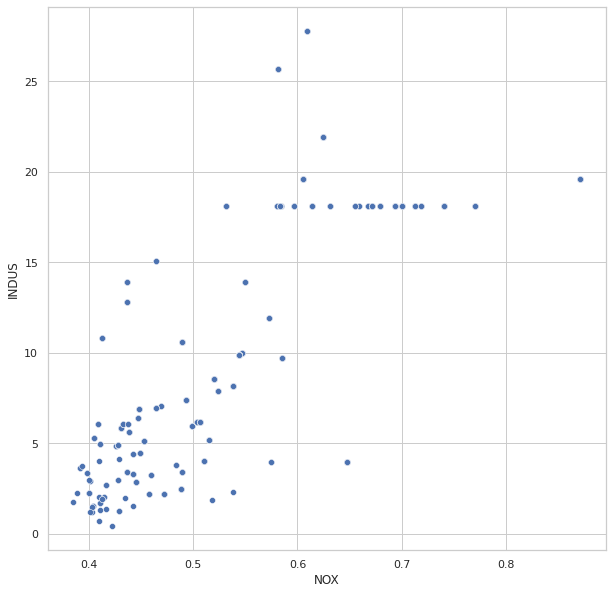

In [59]:
sb.scatterplot(x='NOX',y='INDUS',data=boston)

### We can infer that lesser then NOX emissions more non-retail business areas are present in town

In [60]:
boston.PTRATIO.unique()

array([15.3, 17.8, 18.7, 15.2, 21. , 19.2, 18.3, 17.9, 16.8, 21.1, 17.3,
       15.1, 19.7, 18.6, 16.1, 18.9, 19. , 18.5, 18.2, 18. , 20.9, 19.1,
       21.2, 14.7, 16.6, 15.6, 14.4, 12.6, 17. , 16.4, 17.4, 15.9, 13. ,
       17.6, 14.9, 13.6, 16. , 14.8, 18.4, 19.6, 16.9, 20.2, 15.5, 18.8,
       22. , 20.1])

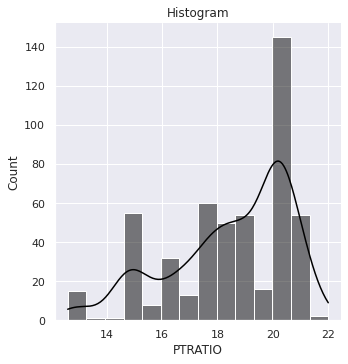

In [66]:
sb.displot(boston['PTRATIO'],color='black',kde=True).set(title='Histogram')
sb.set(rc={'figure.figsize':(20,20)})

# Analysis

In [68]:
stat.levene(boston[boston['CHAS'] == 0]['MEDV'],boston[boston['CHAS'] == 1]['MEDV'],center='mean')

LeveneResult(statistic=8.75190489604598, pvalue=0.0032381193676398632)

In [69]:
stat.ttest_ind(boston[boston['CHAS'] == 0]['MEDV'],boston[boston['CHAS'] == 1]['MEDV'],equal_var=False)

Ttest_indResult(statistic=-3.113291312794837, pvalue=0.003567170098137517)

### Since p-value is less than 0.05 of alpha value we reject null hypothesis and state that they have diffrent statistically significant means, so they are not independet 

In [74]:
bost_35 = boston[boston['AGE'] <= 35]['MEDV']
bost_35_70 = boston[(boston['AGE'] > 35) & (boston['AGE'] < 70)]['MEDV']
bost_70 = boston[boston['AGE'] >= 70]['MEDV']

In [75]:
stat.levene(bost_35,bost_35_70,bost_70,center='mean')

LeveneResult(statistic=2.7806200293748304, pvalue=0.06295337343259189)

In [76]:
stat.f_oneway(bost_35,bost_35_70,bost_70)

F_onewayResult(statistic=36.40764999196599, pvalue=1.7105011022702984e-15)

### Yes they are statistically differint and we reject null hypothesis

In [78]:
stat.pearsonr(boston['NOX'],boston['INDUS'])

PearsonRResult(statistic=0.7636514469209157, pvalue=7.913361061233745e-98)

### Since p-value is less than 0.05 we reject the null hypothesis and state that Nox and indus are correlated

In [79]:
X = boston['DIS']
Y = boston['MEDV']
X = sm.add_constant(X)
model = sm.OLS(Y,X).fit()
predict = model.predict(X)
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Sat, 27 Aug 2022   Prob (F-statistic):           1.21e-08
Time:                        09:01:25   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.000      16.784      19.996
DIS            1.0916      0.188      5.795      0.000       0.722       1.462
==============================================================================
Omnibus:                      139.779   Durbin-Watson:                   0.570
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              305.104
Skew:                           1.466   Prob(JB):                     5.59e-67
Kurtosis:                       5.424   Cond. No.                         9.32
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

### Since the p-value is less than 0.05 we reject the null hypothesis as there is significant evidence that they are impactful